## Kings County House Prices

This project will analyse the Kings County house data set to   
determine the relationship of various variables to the price of houses in Kings County.

We'll start by importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

And then the data

In [2]:
kc_house = pd.read_csv('data/kc_house_data.csv')
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

and the metadata:...

###  Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

Most fields were pulled from the [King County Assessor Data Download](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).

The `address`, `lat`, and `long` fields have been retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). In some cases due to missing or incorrectly-entered data from the King County Assessor, this API returned locations outside of King County, WA. If you plan to use the `address`, `lat`, or `long` fields in your modeling, consider identifying outliers prior to including the values in your model.

### Target
In this project I will be investigating the 'price' variable as the target, or dependent variable.

### Hypothesis
The Null Hypothesis will be that there is no relationship between any of these variables and the price of a house in Kings County.

The Alternative Hypothesis will be that there is some relationship between these variables and the price of a house in Kings County.

### Data cleaning 
Firstly, which other columns to keep?

Are there any variables which will not have an effect on price?

* id
* date
* address

I'll remove these

In [3]:
kc_house = kc_house.drop(columns=['id', 'date', 'address'])
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30155 non-null  float64
 1   bedrooms       30155 non-null  int64  
 2   bathrooms      30155 non-null  float64
 3   sqft_living    30155 non-null  int64  
 4   sqft_lot       30155 non-null  int64  
 5   floors         30155 non-null  float64
 6   waterfront     30155 non-null  object 
 7   greenbelt      30155 non-null  object 
 8   nuisance       30155 non-null  object 
 9   view           30155 non-null  object 
 10  condition      30155 non-null  object 
 11  grade          30155 non-null  object 
 12  heat_source    30123 non-null  object 
 13  sewer_system   30141 non-null  object 
 14  sqft_above     30155 non-null  int64  
 15  sqft_basement  30155 non-null  int64  
 16  sqft_garage    30155 non-null  int64  
 17  sqft_patio     30155 non-null  int64  
 18  yr_bui

I'll also remove some that dont seem to be as crucial at this stage, including;
* view
* sqft_above
* sqft_basement
* yr_renovated
* lat
* long
* yr_built

In [4]:
kc_house = kc_house.drop(columns=['view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'yr_built'])
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30155 non-null  float64
 1   bedrooms      30155 non-null  int64  
 2   bathrooms     30155 non-null  float64
 3   sqft_living   30155 non-null  int64  
 4   sqft_lot      30155 non-null  int64  
 5   floors        30155 non-null  float64
 6   waterfront    30155 non-null  object 
 7   greenbelt     30155 non-null  object 
 8   nuisance      30155 non-null  object 
 9   condition     30155 non-null  object 
 10  grade         30155 non-null  object 
 11  heat_source   30123 non-null  object 
 12  sewer_system  30141 non-null  object 
 13  sqft_garage   30155 non-null  int64  
 14  sqft_patio    30155 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 3.5+ MB


In [5]:
kc_house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source     32
sewer_system    14
sqft_garage      0
sqft_patio       0
dtype: int64

I may as well just get rid of these null values so they dont skew the results.

In [6]:
kc_house = kc_house.dropna()
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 0 to 30154
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30111 non-null  float64
 1   bedrooms      30111 non-null  int64  
 2   bathrooms     30111 non-null  float64
 3   sqft_living   30111 non-null  int64  
 4   sqft_lot      30111 non-null  int64  
 5   floors        30111 non-null  float64
 6   waterfront    30111 non-null  object 
 7   greenbelt     30111 non-null  object 
 8   nuisance      30111 non-null  object 
 9   condition     30111 non-null  object 
 10  grade         30111 non-null  object 
 11  heat_source   30111 non-null  object 
 12  sewer_system  30111 non-null  object 
 13  sqft_garage   30111 non-null  int64  
 14  sqft_patio    30111 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 3.7+ MB


In [7]:
kc_house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000


### Understanding the Data

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

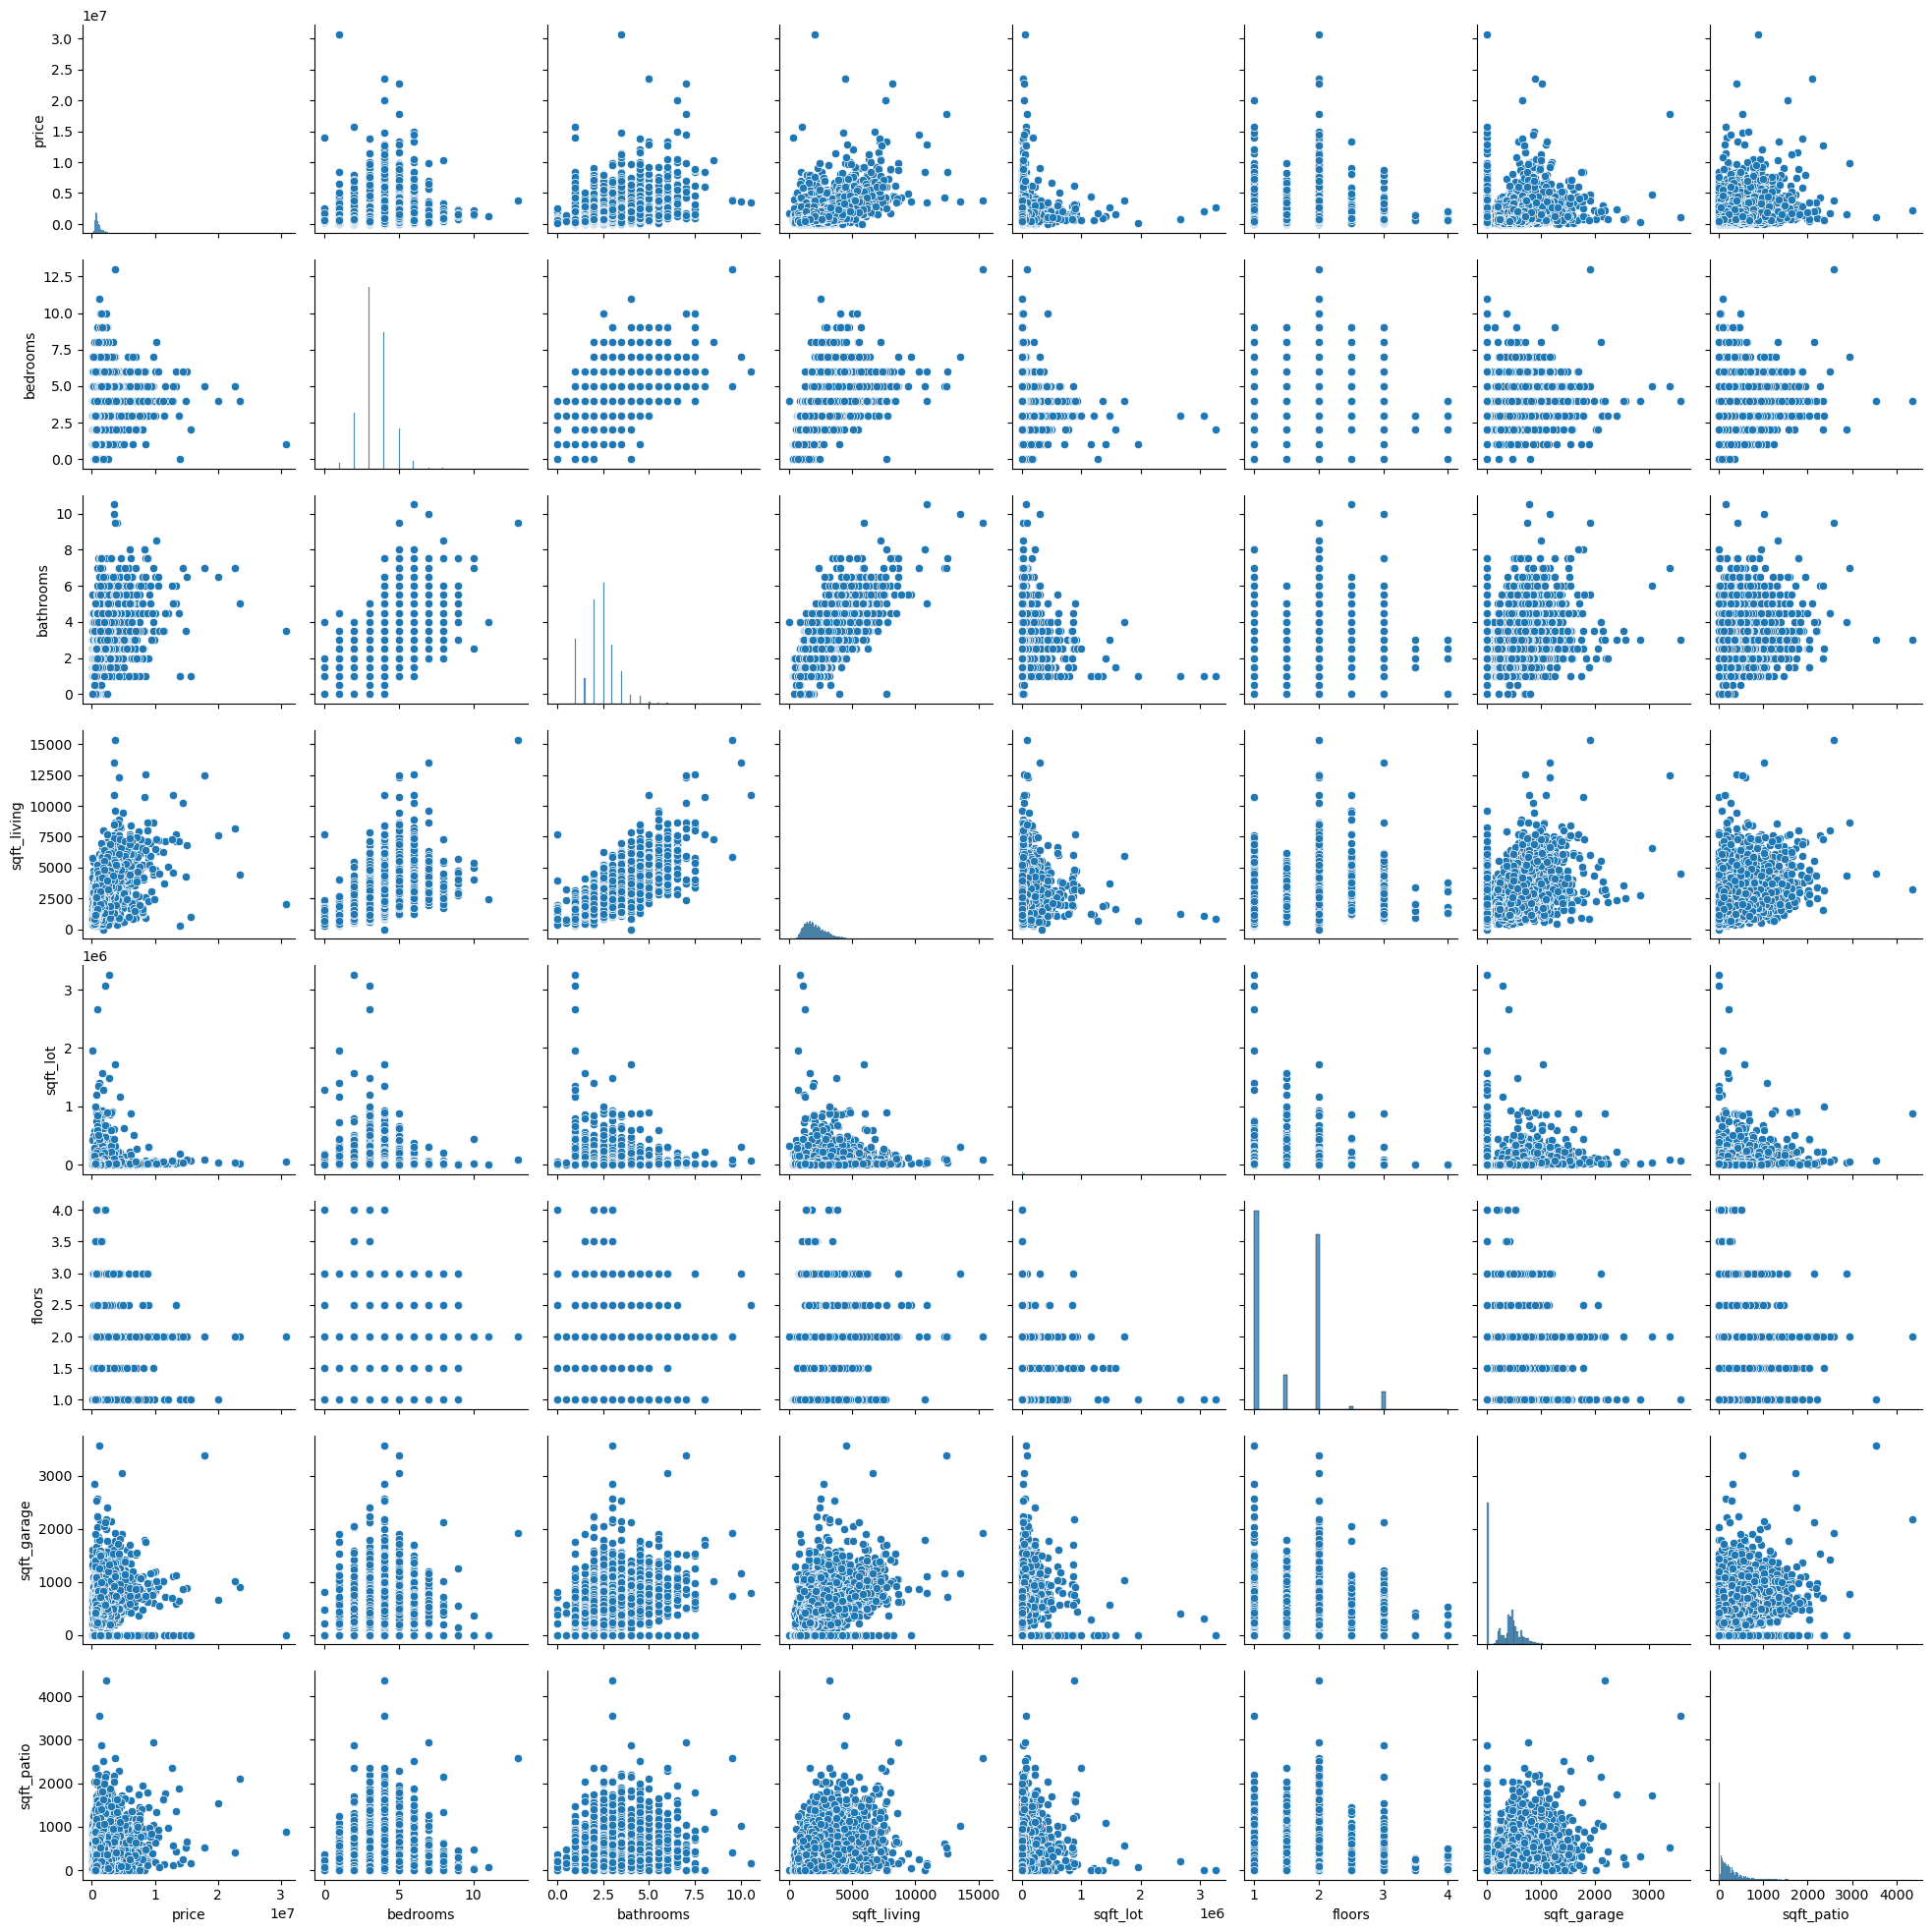

In [9]:
sns.pairplot(kc_house)
plt.show()

### Identifying Categorical Variables

In [10]:
print('bedrooms ', kc_house['bedrooms'].nunique())
print('bathrooms ', kc_house['bathrooms'].nunique())
print('sqft_living ', kc_house['sqft_living'].nunique())
print('sqft_lot ', kc_house['sqft_lot'].nunique())
print('floors ', kc_house['floors'].nunique())
print('waterfront ', kc_house['waterfront'].nunique())
print('greenbelt ', kc_house['greenbelt'].nunique())
print('nuisance ', kc_house['nuisance'].nunique())
print('condition ', kc_house['condition'].nunique())
print('grade ', kc_house['grade'].nunique())
print('heat_source ', kc_house['heat_source'].nunique())
print('sewer_system ', kc_house['sewer_system'].nunique())
print('sqft_garage ', kc_house['sqft_garage'].nunique())
print('sqft_patio ', kc_house['sqft_patio'].nunique())

bedrooms  13
bathrooms  21
sqft_living  1314
sqft_lot  12223
floors  7
waterfront  2
greenbelt  2
nuisance  2
condition  5
grade  12
heat_source  7
sewer_system  4
sqft_garage  411
sqft_patio  526


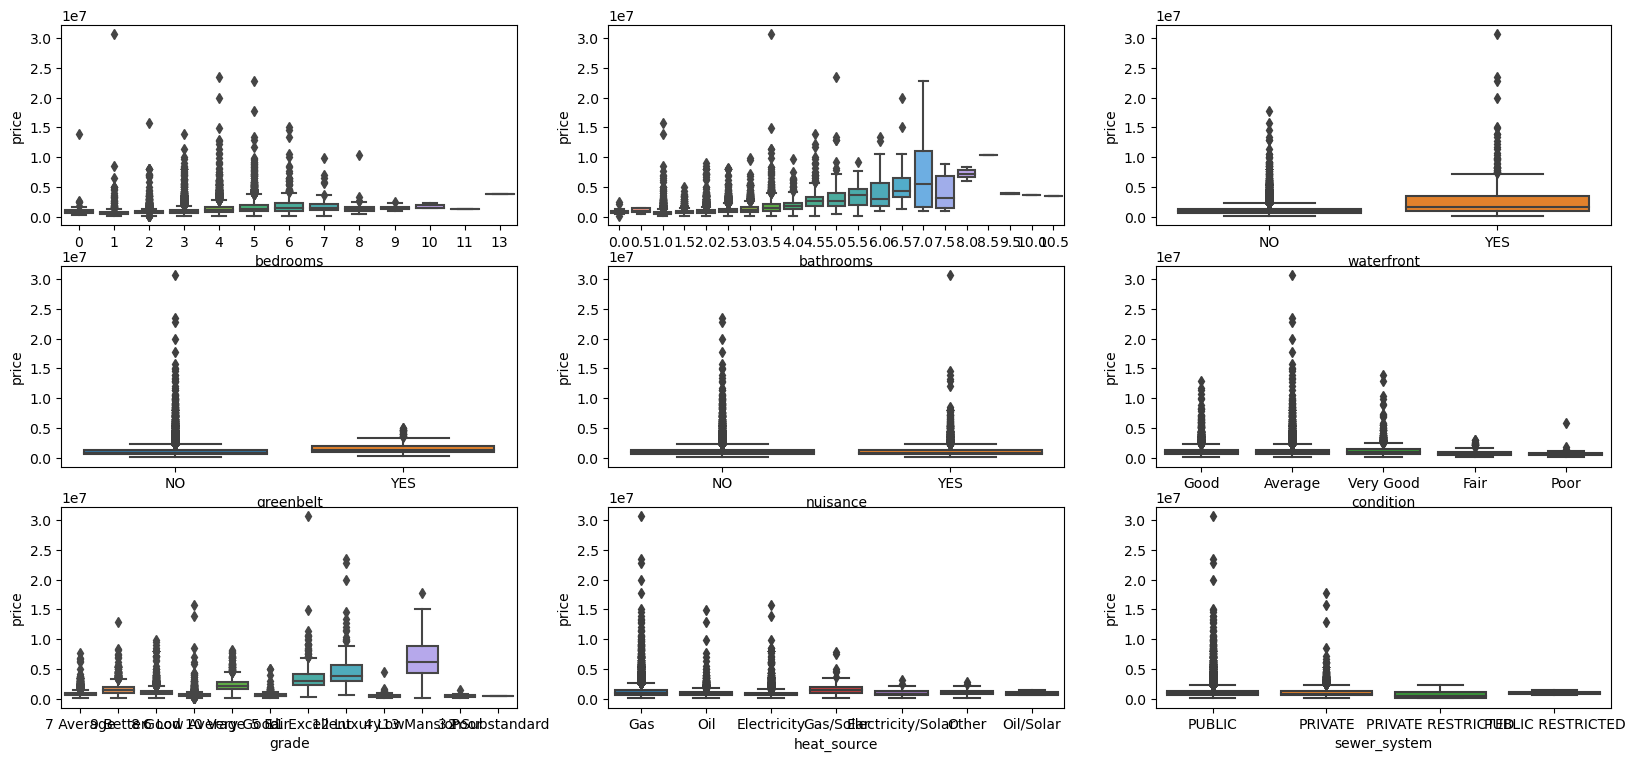

In [11]:
plt.figure(figsize=(20, 12))

plt.subplot(4,3,1)
sns.boxplot(x = 'bedrooms', y = 'price', data = kc_house)
plt.subplot(4,3,2)
sns.boxplot(x = 'bathrooms', y = 'price', data = kc_house)
plt.subplot(4,3,3)
sns.boxplot(x = 'waterfront', y = 'price', data = kc_house)
plt.subplot(4,3,4)
sns.boxplot(x = 'greenbelt', y = 'price', data = kc_house)
plt.subplot(4,3,5)
sns.boxplot(x = 'nuisance', y = 'price', data = kc_house)
plt.subplot(4,3,6)
sns.boxplot(x = 'condition', y = 'price', data = kc_house)
plt.subplot(4,3,7)
sns.boxplot(x = 'grade', y = 'price', data = kc_house)
plt.subplot(4,3,8)
sns.boxplot(x = 'heat_source', y = 'price', data = kc_house)
plt.subplot(4,3,9)
sns.boxplot(x = 'sewer_system', y = 'price', data = kc_house)
plt.show()

In [12]:
kc_house

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,Good,8 Good,Oil,PUBLIC,0,210
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,520
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,Average,7 Average,Gas,PUBLIC,240,110
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,480,100


### Data Preparation

In [13]:
kc_house = pd.get_dummies(kc_house, columns=['bedrooms', 'bathrooms', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], prefix=['bedrooms', 'bathrooms','waterfront', 'greenbelt', 'nuisance', 'condition', 'grade', 'heat_source', 'sewer_system'], drop_first=True, dtype=np.int64)

In [14]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 0 to 30154
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            30111 non-null  float64
 1   sqft_living                      30111 non-null  int64  
 2   sqft_lot                         30111 non-null  int64  
 3   floors                           30111 non-null  float64
 4   sqft_garage                      30111 non-null  int64  
 5   sqft_patio                       30111 non-null  int64  
 6   bedrooms_1                       30111 non-null  int64  
 7   bedrooms_2                       30111 non-null  int64  
 8   bedrooms_3                       30111 non-null  int64  
 9   bedrooms_4                       30111 non-null  int64  
 10  bedrooms_5                       30111 non-null  int64  
 11  bedrooms_6                       30111 non-null  int64  
 12  bedrooms_7             

That's a lot of variables.  
I'll drop some of those high bedroom and bathroom numbers, as they are clearly outliers.

In [15]:
kc_house = kc_house.drop(columns=['bedrooms_6', 'bedrooms_7', 'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_13', 'bathrooms_5.0', 'bathrooms_5.5', 'bathrooms_6.0', 'bathrooms_6.5', 'bathrooms_7.0', 'bathrooms_7.5', 'bathrooms_8.0', 'bathrooms_8.5', 'bathrooms_9.5', 'bathrooms_10.0', 'bathrooms_10.5'])
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30111 entries, 0 to 30154
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            30111 non-null  float64
 1   sqft_living                      30111 non-null  int64  
 2   sqft_lot                         30111 non-null  int64  
 3   floors                           30111 non-null  float64
 4   sqft_garage                      30111 non-null  int64  
 5   sqft_patio                       30111 non-null  int64  
 6   bedrooms_1                       30111 non-null  int64  
 7   bedrooms_2                       30111 non-null  int64  
 8   bedrooms_3                       30111 non-null  int64  
 9   bedrooms_4                       30111 non-null  int64  
 10  bedrooms_5                       30111 non-null  int64  
 11  bathrooms_0.5                    30111 non-null  int64  
 12  bathrooms_1.0          

### Train/Test split

In [16]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(kc_house, train_size = 0.7, test_size = 0.3, random_state = 42)

### Rescaling to better allow comparison

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
num_vars = ['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_garage', 'sqft_patio']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [19]:
df_train.head()

,price,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
27743,0.015384,0.201878,0.002337,0.000000,0.216393,0.105263,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
28927,0.038982,0.240376,0.002441,0.333333,0.157377,0.013730,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
10209,0.023847,0.191549,0.001052,0.333333,0.124590,0.025172,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
10969,0.074787,0.285446,0.002018,0.333333,0.160656,0.050343,0,0,0,1,...,1,0,1,0,0,0,0,0,1,0
4213,0.022545,0.066667,0.001540,0.166667,0.000000,0.100686,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
df_train.describe()

,price,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,...,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000,21077.000000
mean,0.034979,0.173374,0.004995,0.180876,0.107437,0.049301,0.012668,0.132182,0.423874,0.315178,...,0.123974,0.002040,0.682260,0.002799,0.097405,0.000142,0.000854,0.000237,0.856858,0.000095
std,0.028680,0.089990,0.019525,0.189380,0.092945,0.054990,0.111839,0.338697,0.494183,0.464598,...,0.329560,0.045123,0.465609,0.052835,0.296515,0.011930,0.029212,0.015401,0.350226,0.009741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020104,0.108920,0.001354,0.000000,0.000000,0.009153,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.027100,0.154930,0.002164,0.166667,0.127869,0.034325,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.041424,0.220657,0.003109,0.333333,0.167213,0.070938,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
mc_test_corr = df_train.corr()
mc_test_corr

,price,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
price,1.000000,0.608635,0.083315,0.181863,0.255545,0.313513,-0.026155,-0.144498,-0.166846,0.129788,...,0.207272,-0.014110,0.144806,0.033624,-0.065944,-0.000868,0.002761,-0.004993,0.025837,-0.003419
sqft_living,0.608635,1.000000,0.109577,0.304121,0.506577,0.398910,-0.149390,-0.360953,-0.293452,0.318306,...,0.301381,-0.012087,0.273522,0.025791,-0.143803,0.000044,-0.005840,-0.011162,-0.054189,-0.001844
sqft_lot,0.083315,0.109577,1.000000,-0.032430,0.079267,0.140118,0.060071,-0.026759,-0.006205,0.014449,...,0.021350,-0.004281,-0.072647,-0.001147,0.012896,-0.001177,0.065283,0.003258,-0.345457,-0.002140
floors,0.181863,0.304121,-0.032430,1.000000,0.130079,0.132101,-0.070478,-0.035819,-0.119960,0.105482,...,0.274724,0.027146,0.125553,0.003928,-0.223776,-0.004395,0.000665,-0.001156,0.137616,0.016416
sqft_garage,0.255545,0.506577,0.079267,0.130079,1.000000,0.206560,-0.104189,-0.285702,-0.077770,0.231864,...,0.185476,-0.022517,0.301206,0.002080,-0.200562,-0.013792,-0.010418,-0.008568,-0.115192,-0.003701
sqft_patio,0.313513,0.398910,0.140118,0.132101,0.206560,1.000000,-0.042361,-0.104408,-0.073941,0.075302,...,0.156216,0.007281,0.030401,0.012963,-0.101887,-0.006063,0.006164,0.006574,-0.175485,0.008293
bedrooms_1,-0.026155,-0.149390,0.060071,-0.070478,-0.104189,-0.042361,1.000000,-0.044207,-0.097158,-0.076844,...,-0.033600,0.013683,-0.082154,0.010058,0.007144,-0.001351,0.025735,0.025802,-0.044555,-0.001103
bedrooms_2,-0.144498,-0.360953,-0.026759,-0.035819,-0.285702,-0.104408,-0.044207,1.000000,-0.334759,-0.264765,...,-0.086032,-0.014541,-0.200915,-0.012723,0.100457,0.007086,0.022159,0.012181,0.056316,-0.003802
bedrooms_3,-0.166846,-0.293452,-0.006205,-0.119960,-0.077770,-0.073941,-0.097158,-0.334759,1.000000,-0.581901,...,-0.104176,0.005901,-0.047286,-0.001833,0.010616,-0.002186,-0.011930,-0.006978,-0.082290,0.001501
bedrooms_4,0.129788,0.318306,0.014449,0.105482,0.231864,0.075302,-0.076844,-0.264765,-0.581901,1.000000,...,0.120992,0.005539,0.152823,0.006581,-0.052717,0.000466,-0.005850,-0.003819,0.020089,0.003875


In [22]:
mc_test_corr.sort_values('price', ascending=False).head(50)

,price,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
price,1.000000,0.608635,0.083315,0.181863,0.255545,0.313513,-0.026155,-0.144498,-0.166846,0.129788,...,0.207272,-0.014110,0.144806,0.033624,-0.065944,-0.000868,0.002761,-0.004993,0.025837,-0.003419
sqft_living,0.608635,1.000000,0.109577,0.304121,0.506577,0.398910,-0.149390,-0.360953,-0.293452,0.318306,...,0.301381,-0.012087,0.273522,0.025791,-0.143803,0.000044,-0.005840,-0.011162,-0.054189,-0.001844
grade_11 Excellent,0.318236,0.292773,0.046584,0.068309,0.177283,0.141170,-0.009498,-0.043010,-0.070639,0.054327,...,-0.043808,-0.005265,0.061732,0.001646,-0.034077,-0.001389,-0.003405,-0.001794,-0.019614,-0.001134
sqft_patio,0.313513,0.398910,0.140118,0.132101,0.206560,1.000000,-0.042361,-0.104408,-0.073941,0.075302,...,0.156216,0.007281,0.030401,0.012963,-0.101887,-0.006063,0.006164,0.006574,-0.175485,0.008293
grade_12 Luxury,0.297759,0.249077,0.023924,0.042537,0.137157,0.127405,-0.007500,-0.021591,-0.045143,0.020144,...,-0.024908,-0.002994,0.029728,0.023736,-0.021751,-0.000790,-0.001936,-0.001020,-0.009928,-0.000645
sqft_garage,0.255545,0.506577,0.079267,0.130079,1.000000,0.206560,-0.104189,-0.285702,-0.077770,0.231864,...,0.185476,-0.022517,0.301206,0.002080,-0.200562,-0.013792,-0.010418,-0.008568,-0.115192,-0.003701
bathrooms_4.5,0.253832,0.311821,0.022682,0.108273,0.126671,0.138998,-0.011861,-0.052025,-0.105545,0.010148,...,0.061970,-0.006027,0.063741,-0.007063,-0.041348,-0.001590,-0.003897,0.021468,0.011043,-0.001299
waterfront_YES,0.244663,0.083414,0.068013,0.003151,-0.014825,0.121664,0.077192,0.016487,-0.013049,-0.019258,...,-0.005216,-0.005746,-0.049341,0.000447,0.004311,-0.001516,0.048232,0.047309,-0.106206,-0.001238
grade_9 Better,0.207272,0.301381,0.021350,0.274724,0.185476,0.156216,-0.033600,-0.086032,-0.104176,0.120992,...,1.000000,-0.004246,0.120362,0.007318,-0.101245,-0.004488,-0.010998,0.012902,0.003712,-0.003665
bedrooms_5,0.202489,0.364781,-0.005196,0.079716,0.129146,0.119195,-0.036483,-0.125702,-0.276268,-0.218504,...,0.092459,-0.007356,0.095836,0.007554,-0.047135,-0.003843,-0.003851,-0.004961,0.052257,-0.003138


'sqft_living' is the highest variable correlated to price.  
I'll start building my model there.

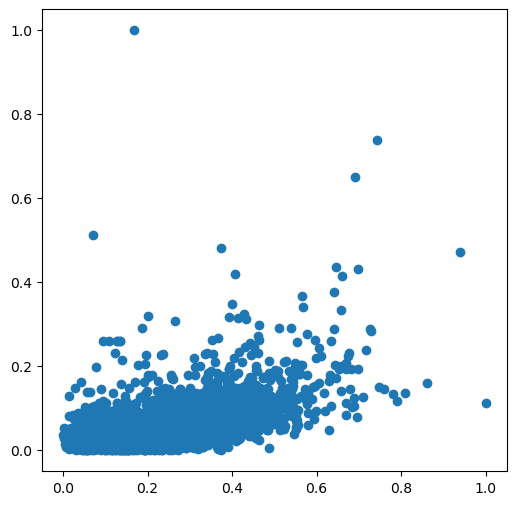

In [23]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.sqft_living, df_train.price)
plt.show()

In [24]:
y_train = df_train.pop('price')
X_train = df_train

In [25]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['sqft_living']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [26]:
lr.params

const          0.001349
sqft_living    0.193972
dtype: float64

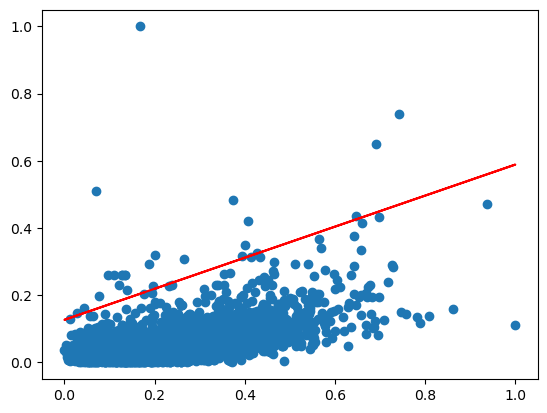

In [27]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [28]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.240e+04
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:58:28   Log-Likelihood:                 49826.
No. Observations:               21077   AIC:                        -9.965e+04
Df Residuals:                   21075   BIC:                        -9.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0013      0.000      3.965      

R-squared is 0.370.  
I can do better than that :-)

The next highest correlated variable was 'grade_11 Excellent'  
we'll add that to the model

In [29]:
X_train_lm = X_train[['sqft_living', 'grade_11 Excellent']]

In [30]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                 0.003315
sqft_living           0.179680
grade_11 Excellent    0.038234
dtype: float64

In [31]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     6790.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:58:34   Log-Likelihood:                 50192.
No. Observations:               21077   AIC:                        -1.004e+05
Df Residuals:                   21074   BIC:                        -1.004e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0033      0

Okay,   
Its an improvement.  
R-squared went up to 0.392
Still, I'll try adding another variable.

In [32]:
X_train_lm = X_train[['sqft_living', 'grade_11 Excellent', 'sqft_patio']]

In [33]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                 0.002995
sqft_living           0.169743
grade_11 Excellent    0.037704
sqft_patio            0.041581
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     4629.
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:58:42   Log-Likelihood:                 50284.
No. Observations:               21077   AIC:                        -1.006e+05
Df Residuals:                   21073   BIC:                        -1.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0030      0

Ok,     
up a little again to 0.397  
I might try adding in all the variables and see what that does.  

In [35]:
kc_house.columns

Index(['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_garage',
       'sqft_patio', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bathrooms_0.5', 'bathrooms_1.0', 'bathrooms_1.5',
       'bathrooms_2.0', 'bathrooms_2.5', 'bathrooms_3.0', 'bathrooms_3.5',
       'bathrooms_4.0', 'bathrooms_4.5', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES', 'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_2 Substandard', 'grade_3 Poor',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'heat_source_Electricity/Solar',
       'heat_source_Gas', 'heat_source_Gas/Solar', 'heat_source_Oil',
       'heat_source_Oil/Solar', 'heat_source_Other',
       'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC',
       'sewer_system_PUBLIC RESTRICTED'],
      dtype='object')

In [36]:
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const                              0.047856
sqft_living                        0.109031
sqft_lot                           0.042214
floors                            -0.007302
sqft_garage                       -0.023407
sqft_patio                         0.022698
bedrooms_1                         0.014811
bedrooms_2                         0.006162
bedrooms_3                         0.005467
bedrooms_4                         0.003855
bedrooms_5                         0.003936
bathrooms_0.5                     -0.024189
bathrooms_1.0                     -0.018064
bathrooms_1.5                     -0.019771
bathrooms_2.0                     -0.019434
bathrooms_2.5                     -0.021112
bathrooms_3.0                     -0.019573
bathrooms_3.5                     -0.018029
bathrooms_4.0                     -0.017793
bathrooms_4.5                     -0.009908
waterfront_YES                     0.038701
greenbelt_YES                     -0.000622
nuisance_YES                    

In [37]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     490.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:58:52   Log-Likelihood:                 52630.
No. Observations:               21077   AIC:                        -1.052e+05
Df Residuals:                   21030   BIC:                        -1.048e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

An R-squared of 0.519 is an improvement.  
But there are also some high P values here.  


In [38]:
X_train = X_train.drop('condition_Fair', axis=1)

In [39]:
X_train = X_train.drop('greenbelt_YES', axis=1)
X_train = X_train.drop('condition_Poor', axis=1)
X_train = X_train.drop('grade_2 Substandard', axis=1)
X_train = X_train.drop('heat_source_Electricity/Solar', axis=1)
X_train = X_train.drop('heat_source_Oil/Solar', axis=1)
X_train = X_train.drop('heat_source_Other', axis=1)
X_train = X_train.drop('sewer_system_PRIVATE RESTRICTED', axis=1)
X_train = X_train.drop('sewer_system_PUBLIC RESTRICTED', axis=1)

In [40]:
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     609.3
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:58:58   Log-Likelihood:                 52625.
No. Observations:               21077   AIC:                        -1.052e+05
Df Residuals:                   21039   BIC:                        -1.049e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

I'll check VIF values 

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,bathrooms_2.5,21.68
7,bedrooms_3,21.54
13,bathrooms_2.0,19.41
8,bedrooms_4,15.94
0,sqft_living,14.04
11,bathrooms_1.0,13.33
30,grade_7 Average,11.68
15,bathrooms_3.0,10.55
31,grade_8 Good,8.45
36,sewer_system_PUBLIC,8.42


I'll try to remove some highly correlated pairs.

In [43]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.5) & (df.cc<1)]

,cc
pairs,
"(bedrooms_4, bedrooms_3)",0.581901
"(grade_7 Average, grade_8 Good)",0.540155
"(sqft_living, sqft_garage)",0.506577


In [44]:
X_train = X_train.drop('bedrooms_3', axis=1)
X_train = X_train.drop('grade_7 Average', axis=1)
X_train = X_train.drop('sqft_garage', axis=1)

In [45]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,12.92
33,sewer_system_PUBLIC,8.16
12,bathrooms_2.5,6.26
30,heat_source_Gas,4.79
11,bathrooms_2.0,4.53
13,bathrooms_3.0,3.73
9,bathrooms_1.0,3.65
2,floors,3.08
14,bathrooms_3.5,2.88
3,sqft_patio,2.30


I really dont want to remove 'sqft_living',  
but perhaps it will come down if i remove the next two highest variables.

In [46]:
X_train = X_train.drop('sewer_system_PUBLIC', axis=1)
X_train = X_train.drop('bathrooms_2.5', axis=1)

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,10.63
29,heat_source_Gas,4.00
2,floors,2.68
3,sqft_patio,2.27
9,bathrooms_1.0,2.26
6,bedrooms_4,2.05
27,grade_8 Good,1.97
11,bathrooms_2.0,1.69
28,grade_9 Better,1.66
7,bedrooms_5,1.57


In [48]:
X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     593.8
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:59:48   Log-Likelihood:                 51730.
No. Observations:               21077   AIC:                        -1.034e+05
Df Residuals:                   21044   BIC:                        -1.031e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.349e-

Again we have some high P values.  
I'll get rid of those

In [49]:
X_train = X_train.drop('sqft_lot', axis=1)
X_train = X_train.drop('bathrooms_0.5', axis=1)
X_train = X_train.drop('bathrooms_3.0', axis=1)
X_train = X_train.drop('bathrooms_4.0', axis=1)
X_train = X_train.drop('grade_8 Good', axis=1)

In [50]:
X_train = X_train.drop('grade_3 Poor', axis=1)


In [51]:
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     730.4
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        06:59:56   Log-Likelihood:                 51726.
No. Observations:               21077   AIC:                        -1.034e+05
Df Residuals:                   21050   BIC:                        -1.032e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,9.28
23,heat_source_Gas,3.88
1,floors,2.46
2,sqft_patio,2.24
7,bathrooms_1.0,2.17
5,bedrooms_4,2.04
9,bathrooms_2.0,1.53
4,bedrooms_2,1.53
14,condition_Good,1.52
25,heat_source_Oil,1.52


In [53]:
df = X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.01) & (df.cc<1)]

,cc
pairs,
"(heat_source_Gas, heat_source_Oil)",0.481374
"(bathrooms_1.0, grade_6 Low Average)",0.423744
"(bathrooms_1.0, sqft_living)",0.421178
"(sqft_living, sqft_patio)",0.398910
"(bedrooms_5, sqft_living)",0.364781
...,...
"(grade_6 Low Average, waterfront_YES)",0.011161
"(bathrooms_1.5, grade_4 Low)",0.011018
"(grade_13 Mansion, bathrooms_1.0)",0.010487


I dont want to remove 'sqft_living', but it still has a high VIF.  
I'll remove some of these variables that have a correlation with 'sqft_living'

In [54]:
X_train = X_train.drop('bathrooms_1.0', axis=1)
X_train = X_train.drop('sqft_patio', axis=1)
X_train = X_train.drop('bedrooms_5', axis=1)

and see what the model looks like now.

In [55]:
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     815.4
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:00:06   Log-Likelihood:                 51663.
No. Observations:               21077   AIC:                        -1.033e+05
Df Residuals:                   21053   BIC:                        -1.031e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

I'll remove variables with high P values

In [56]:
X_train = X_train.drop('bathrooms_1.5', axis=1)
X_train = X_train.drop('floors', axis=1)

In [57]:
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     893.1
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:00:10   Log-Likelihood:                 51662.
No. Observations:               21077   AIC:                        -1.033e+05
Df Residuals:                   21055   BIC:                        -1.031e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [58]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,5.71
18,heat_source_Gas,3.62
3,bedrooms_4,1.71
9,condition_Good,1.43
17,grade_9 Better,1.33
20,heat_source_Oil,1.32
4,bathrooms_2.0,1.32
2,bedrooms_2,1.27
5,bathrooms_3.5,1.24
16,grade_6 Low Average,1.22


'sqft_living' still has a higher VIF than other variables.  
I'll remove 'heat_source_Gas' as one final attempt to get that VIF below 5.

In [59]:
X_train = X_train.drop('heat_source_Gas', axis=1)

In [60]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,sqft_living,3.37
3,bedrooms_4,1.70
9,condition_Good,1.41
17,grade_9 Better,1.33
4,bathrooms_2.0,1.31
2,bedrooms_2,1.25
5,bathrooms_3.5,1.24
16,grade_6 Low Average,1.21
8,nuisance_YES,1.21
1,bedrooms_1,1.19


In [61]:
X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     935.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:00:18   Log-Likelihood:                 51653.
No. Observations:               21077   AIC:                        -1.033e+05
Df Residuals:                   21056   BIC:                        -1.031e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

and finally remove 'bathrooms_2.0' as to keep P values below 0.05

In [62]:
X_train = X_train.drop('bathrooms_2.0', axis=1)

In [63]:
X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     984.9
Date:                Mon, 15 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:00:24   Log-Likelihood:                 51651.
No. Observations:               21077   AIC:                        -1.033e+05
Df Residuals:                   21057   BIC:                        -1.031e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

Finally, with P values all below 0.05.  
and VIF below 5.  
I can 

In [64]:
y_train_price = lr_8.predict(X_train_lm)

Text(0.5, 0, 'Errors')

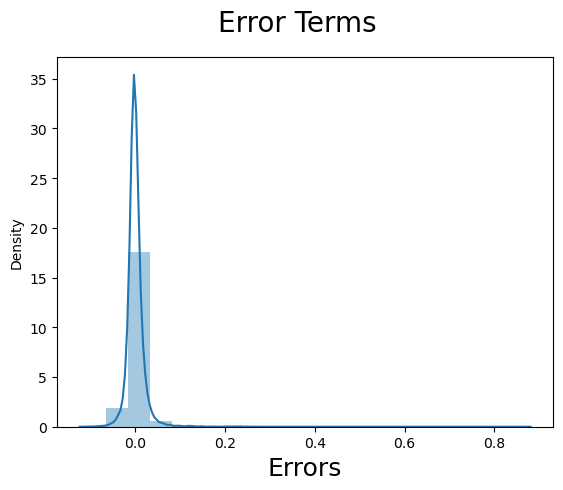

In [65]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

And now to see how the model goes predicting values in the test set.

In [66]:
num_vars = ['price', 'sqft_living', 'sqft_lot', 'floors', 'sqft_garage', 'sqft_patio']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
df_test.describe()

,price,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,...,grade_9 Better,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,...,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.000000,9034.0,9034.000000,9034.000000
mean,0.035735,0.175537,0.004990,0.181850,0.110488,0.050831,0.012619,0.126079,0.421961,0.326323,...,0.131835,0.001771,0.685853,0.003764,0.093646,0.000111,0.000221,0.0,0.853110,0.000111
std,0.030313,0.094608,0.015545,0.189000,0.095345,0.058703,0.111629,0.331957,0.493900,0.468893,...,0.338330,0.042049,0.464201,0.061236,0.291352,0.010521,0.014878,0.0,0.354015,0.010521
min,0.000031,-0.024131,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.020266,0.108920,0.001397,0.000000,0.000000,0.009153,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,0.027545,0.156808,0.002182,0.166667,0.131148,0.034325,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,0.041794,0.221596,0.003173,0.333333,0.170492,0.073227,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,0.764018,1.417840,0.529393,1.000000,1.173770,0.812357,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [68]:
y_test = df_test.pop('price')
X_test = df_test

In [75]:
X_test = sm.add_constant(X_test)

In [76]:
X_test = X_test.drop(['condition_Fair', 'greenbelt_YES', 'condition_Poor', 'grade_2 Substandard', 'heat_source_Electricity/Solar', 'heat_source_Oil/Solar', 'heat_source_Other', 'sewer_system_PRIVATE RESTRICTED', 'sewer_system_PUBLIC RESTRICTED', 'bedrooms_3', 'grade_3 Poor', 'grade_7 Average', 'sqft_garage', 'sewer_system_PUBLIC', 'bathrooms_2.5', 'sqft_lot', 'bathrooms_0.5', 'bathrooms_3.0', 'bathrooms_4.0', 'grade_8 Good', 'bathrooms_1.0', 'sqft_patio', 'bedrooms_5', 'bathrooms_1.5', 'floors', 'heat_source_Gas', 'bathrooms_2.0'], axis = 1)

In [77]:
y_pred = lr_8.predict(X_test)

### Model Evaluation

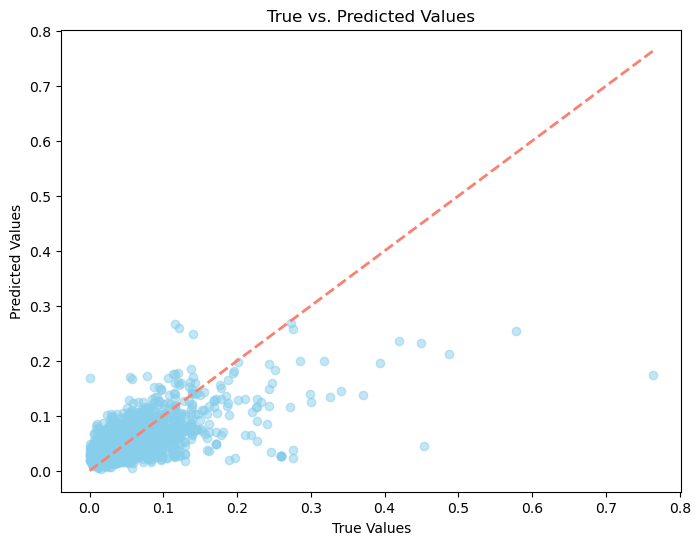

In [78]:
# Visualization of True vs. Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='salmon', linewidth=2)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

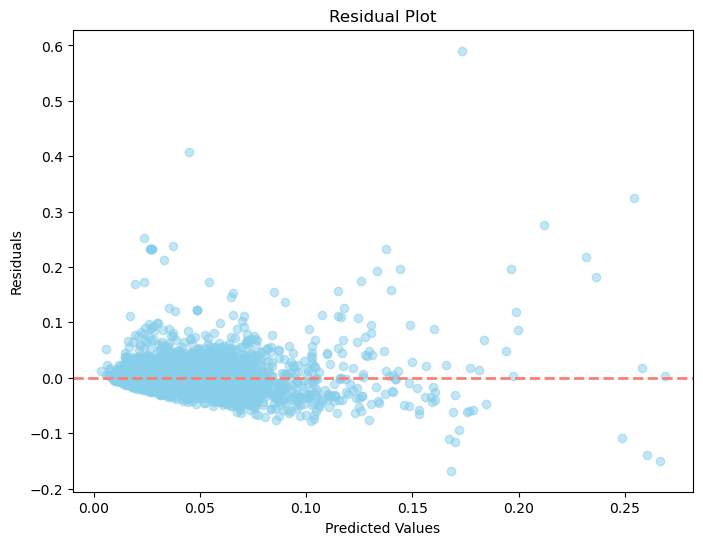

In [79]:
# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred_m4, color='skyblue', alpha=0.5)
plt.axhline(y=0, color='salmon', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

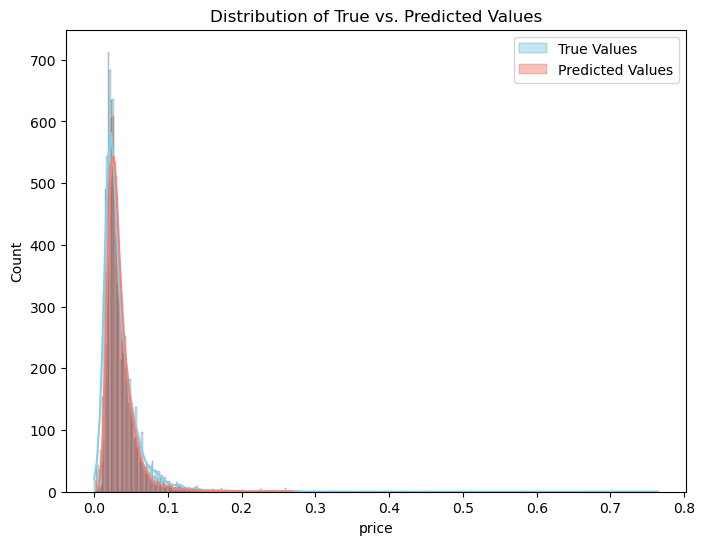

In [80]:
# Distribution Plot
plt.figure(figsize=(8, 6))
sns.histplot(y_test, color='skyblue', kde=True, label='True Values')
sns.histplot(y_pred, color='salmon', kde=True, label='Predicted Values')
plt.title('Distribution of True vs. Predicted Values')
plt.legend()
plt.show()

## Final Evaluation  
It seems that there are some significant outliers,  
which could be dealt with in next steps.
and some skewness.

But the model appears to be predicting values from the test set reasonably well.